**Objective** - To cluster clients of a wholesale distributer based on thier annual spending on divers product categories, such as milk, grocery, redion etc.

**Data used**- Wholesale customer data.

**Importing required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

**Load dataset and have a loook at the first few rows**

In [2]:
dataset = pd.read_csv("Wholesale customers data.csv")
dataset.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


**Get information about dataset**
- Number of samples (440)
- Number of variables (8)

In [3]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


**Get description of dataset**

In [4]:
dataset.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


We can see from our dataset that see that we have large ranges in most of our variables i.e the difference between the maximum value and the minimum value is too large, this implies that there is a lot of variation in the maginitude of the data. Variables like Channel and Region have low magnitude whereas variables like Fresh, Milk, Grocery, etc. have a higher magnitude.

We need to perform scaling to our dataset so as to make the variables have almost the same range, this is because K-Means is a distance-based algorithm, this big difference of magnitude can create a problem. 

In [5]:
#standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)

#sattistics of csaled data
pd.DataFrame(dataset_scaled).describe()

/usr/lib/python3/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/lib/python3/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


The range in each varibale seems to be almost similar now. Now, it is time to create our kmeans function and fit it on the data.

To perfprom a non random initialization, we use k-means++ which generally produces better results. We also decide to avoid it.

 

In [37]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(dataset_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Now we will evaluate if our above formed 2 clusters are well formed. To do that, we will calculate the inertia of the clusters:



The inertia tells us how far the points within a cluster are. It calculates the sum of distances of all the points within a cluster from the centroid of that cluster(Sum of intracluster distances).

**We know that our clusters are well formed if the inertia value is smalll as possible**.



In [38]:
# inertia on the fitted data
kmeans.inertia_


2599.38555935614

We got an inertia value of almost 2600 which is big, implying that our 2 clusters are not well formed. So, we need to reduce this value. 


We now determine the optimum number of clusters using the elbow curve method.

We will fit multiple k-means models and in each successive model, then we will increase the number of clusters. We will store the inertia value of each model and then plot it to visualize the result:

Text(0, 0.5, 'Inertia')

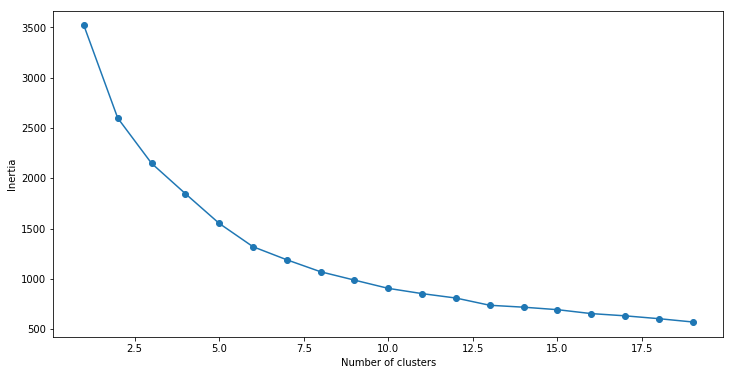

In [39]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(dataset_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

We can see from the above elbow curve that the optimal number of clusters is between between 5 to 8. Let’s try the number of clusters as 6 and fit the model:

In [49]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 6, init='k-means++')
kmeans.fit(dataset_scaled)
pred = kmeans.predict(dataset_scaled)


In [50]:
kmeans.inertia_

1314.9218179509749

We can see that the value of inertia has reduced from almost 2600 to a value almost to 1315.

Finally, let’s look at the value count of points in each of the above-formed clusters:

In [52]:
Cluster_frame = pd.DataFrame(dataset_scaled)
Cluster_frame['cluster'] = pred
Cluster_frame['cluster'].value_counts()

0    172
3    125
4     86
2     45
1     11
5      1
Name: cluster, dtype: int64

***k_means from scratch***

In [61]:
X = dataset_scaled

#A function that is used to calclute distance between two points and assigning point to closest centroid,
from sklearn.metrics import pairwise_distances_argmin

def k_means(X, n_clusters, rseed=3):
    
    rn = np.random.RandomState(rseed)
    #randomly select centroids from examples or samples
    i = rn.permutation(X.shape[0])[:n_clusters]

    centroids = X[i]
    
    
    #Repeat calculation of distances between centers and datapoints
    #Assign each datapont to closest center
    #Find average datapoint and make it the new center
    while True:
        cluster_labels = pairwise_distances_argmin(X, centroids)
        new_centroids = np.array([X[cluster_labels==i].mean(0)
                               for i in range(n_clusters)])
        #comparing positions of old and new centroids
        if np.all(centroids ==new_centroids):
    
            break
        centroids = new_centroids
    return centroids, cluster_labels
centroids, cluster_labels = k_means(X, 6)

Number of datapoints in each cluster_label. 

In [63]:
cluster_frame = pd.DataFrame(X)
cluster_frame['clusters'] = cluster_labels
cluster_frame['clusters'].value_counts()

1    164
0    124
2     85
4     53
3     10
5      4
Name: clusters, dtype: int64